In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [44]:
df = pd.read_csv("Dataframe_clean.csv")
df.drop(columns="date",inplace=True)

On va encore une fois scaller nos données afin qu'elles soient compréhensibles par notre réseau. 

In [45]:
df

,Unnamed: 0,TO,R,hosp,rad,conf,conf_j1,dc_tot
0,0,0.965599,0.712412,32654.0,134923.0,33172.0,33172.0,29673.0
1,1,0.966192,0.682531,32676.0,137124.0,56966.0,23794.0,30400.0
2,2,0.959866,0.658918,32468.0,139110.0,89061.0,32095.0,31025.0
3,3,0.964808,0.641595,33050.0,139779.0,116289.0,27228.0,31598.0
4,4,0.969355,0.630205,33466.0,140849.0,125695.0,9406.0,32375.0
...,...,...,...,...,...,...,...,...
503,503,0.305654,0.000000,21688.0,598673.0,23944255.0,169024.0,142134.0
504,504,0.306643,0.000000,21922.0,600034.0,24113566.0,169311.0,142273.0
505,505,0.303875,0.000000,22066.0,601418.0,24262195.0,148629.0,142407.0
506,506,0.301107,0.000000,22113.0,602269.0,24394309.0,132114.0,142475.0


In [47]:
tr_df = df[["TO","hosp","rad","conf"]]
te_df = df["conf"]

on crée notre série de test et de train. 

In [68]:
t = [1,2,3]
type(t)

list

In [71]:
def flatten(t): 
  return [item for sublist in t for item in sublist]

In [72]:
train = []
test = [] 

for k in range(14,500): 
   train.append(np.array(flatten([tr_df["conf"][k-14:k],[tr_df["hosp"][k-1]],[tr_df["TO"][k-1]],[tr_df["rad"][k-1]]])))
   test.append(np.array(te_df[k:k+7]))

scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)


train_training = np.array(train[:2* len(train)//3])
test_training = np.array(test[:2* len(test)//3])

train_testing = np.array(train[2* len(train)//3:])
test_testing = np.array(test[2* len(test)//3:])


In [73]:
test_testing.shape, train_testing.shape

((162, 7), (162, 17))

In [88]:
model = Sequential()
model.add(LSTM(units = 100,return_sequences=True,input_shape=(17,1)))
model.add(LSTM(units =100))
model.add(Dense(units=7))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=['categorical_accuracy'])

history = model.fit(train_training,test_training, epochs=7, batch_size=64)

Epoch 1/7
6/6 [==============================] - 5s 43ms/step - loss: 0.0136 - categorical_accuracy: 0.2623
Epoch 2/7
6/6 [==============================] - 0s 38ms/step - loss: 0.0038 - categorical_accuracy: 0.0741
Epoch 3/7
6/6 [==============================] - 0s 35ms/step - loss: 0.0024 - categorical_accuracy: 0.0247
Epoch 4/7
6/6 [==============================] - 0s 34ms/step - loss: 0.0014 - categorical_accuracy: 0.4105
Epoch 5/7
6/6 [==============================] - 0s 34ms/step - loss: 4.5385e-04 - categorical_accuracy: 0.2901
Epoch 6/7
6/6 [==============================] - 0s 37ms/step - loss: 3.8552e-04 - categorical_accuracy: 0.1512
Epoch 7/7
6/6 [==============================] - 0s 36ms/step - loss: 1.8983e-04 - categorical_accuracy: 0.4105


In [89]:
pred = model.predict(train_testing)

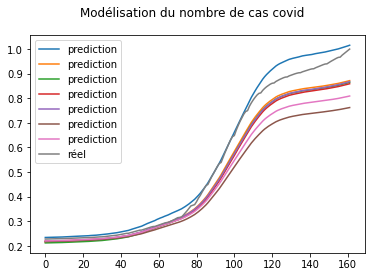

In [90]:
fig,ax = plt.subplots()
fig.suptitle("Modélisation du nombre de cas covid")
ax.plot(pred, label="prediction")
ax.plot(test_testing[:,0], label="réel")
plt.legend()
plt.show()

RMSE: 0.07879633827979309


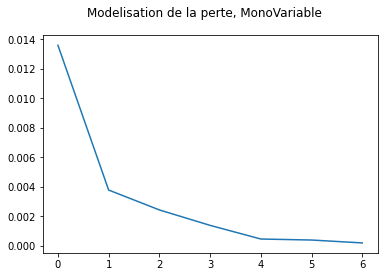

In [91]:
rmse = math.sqrt(mean_squared_error(test_testing, pred))
print(f'RMSE: {rmse}')

fig, ax = plt.subplots()
fig.suptitle("Modelisation de la perte, MonoVariable")
ax.plot(history.history["loss"])
plt.show()